# Kaggle Spaceship Titanic

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

## Training file reading and basic variables analysis

We read the training file and print some rows to check how it looks

In [2]:
# Training file import and data frame display
df = pd.read_csv('/Users/pabloserranomolinero/Downloads/spaceship-titanic/train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


We check columns types

In [3]:
# Columns types
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Here is a brief desfinition of each variable: 
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Now we will perform some basic statistics to do some quality checks

In [4]:
# Data frame description
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,9115_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


In this descriptive statistics we don't see any wrong values such as negative ages or price of service. 

Let's check now the number of missing values we have in each variable.

In [5]:
# Data frame missing values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We see some missing values that we need to manage. At first, we will drop those values but further analysis may be needed to impute those missing values instead of deleting them.

In [6]:
#  Drop na values
df_na = df.dropna()
df_na.shape

(6606, 14)

We see that after cleaning na values we lost almost 2K obs in our dataset. We may look for some more optimal solution to this issue.

As a first simple approach to solve this we will fill missing values with the mode of the variable.

In [7]:
# Fill na values
# We start by filling the missing values with the mode of the object columns
char_variables = list(df.select_dtypes(include=['object']).columns)

# We remove the columns that we do not want to fill since it doesnt make sense
char_variables.remove('Name')
char_variables.remove('Cabin')

for i in char_variables:
    df[i] = df[i].fillna(df[i].mode()[0])

For numeric variables we will first take a look to the distributions

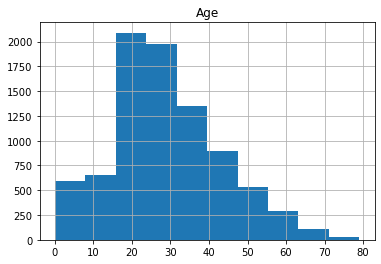

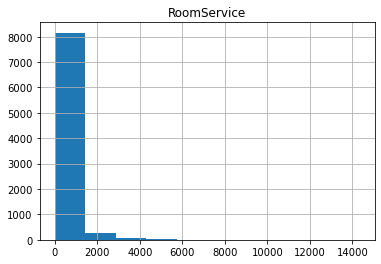

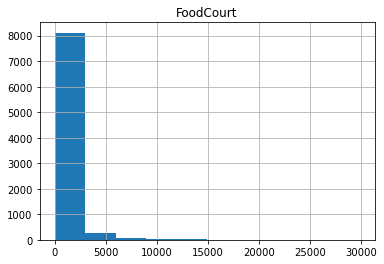

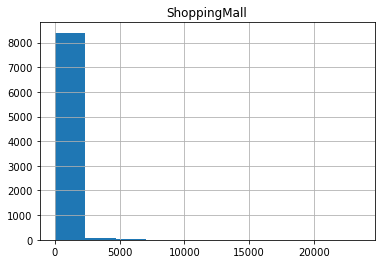

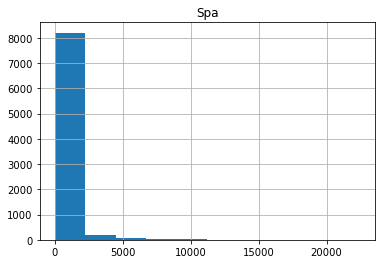

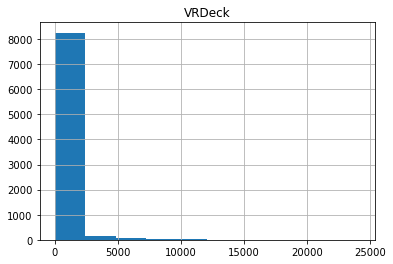

In [8]:
# We fill the missing values with the mean of the numeric columns
numeric_variables = list(df.select_dtypes(include=['int64', 'float64']).columns)

for col in numeric_variables:
    df.hist(column=col)

We can see that for the services variables mean doesn't make sense, since the distribution is very skewed. We will use the median for the na filling.


In [9]:
for i in numeric_variables:
    df[i] = df[i].fillna(df[i].median())

We calculate again a dataframe without missing values after the treatment

In [10]:
#  Drop na values
df.dropna(inplace=True)


Now we lost only near 200 obs

## Feature engineering

In this step we will generate new features based on existing variables in our dataset.

In [11]:
# Based on the information we have, we can create new columns:

# New column with the passenger group
df['PassengerGroup'] = df['PassengerId'].str.slice(0, 4)

# New column with deck
df['Deck'] = df['Cabin'].str.split('/').str[0]

# New column with room number
df['Room'] = df['Cabin'].str.split('/').str[1]

# New column with side of the ship
df['Side'] = df['Cabin'].str.split('/').str[2]

# New colums to indicate if the passenger has a family member or not
df['HasFamily'] = df['PassengerGroup'].isin(df['PassengerGroup'].value_counts()[df['PassengerGroup'].value_counts() > 1].index).astype('bool')


In [12]:
# We create two new data frames, one with the features and the other with the target
Features = df.loc[:, df.columns.difference(['Transported', 'PassengerId', 'Name', 'Cabin','Room','PassengerGroup'])]
char_features = list(Features.select_dtypes(include=['object']).columns)
y = df['Transported']
Features

,Age,CryoSleep,Deck,Destination,FoodCourt,HasFamily,HomePlanet,RoomService,ShoppingMall,Side,Spa,VIP,VRDeck
0,39.0,False,B,TRAPPIST-1e,0.0,False,Europa,0.0,0.0,P,0.0,False,0.0
1,24.0,False,F,TRAPPIST-1e,9.0,False,Earth,109.0,25.0,S,549.0,False,44.0
2,58.0,False,A,TRAPPIST-1e,3576.0,True,Europa,43.0,0.0,S,6715.0,True,49.0
3,33.0,False,A,TRAPPIST-1e,1283.0,True,Europa,0.0,371.0,S,3329.0,False,193.0
4,16.0,False,F,TRAPPIST-1e,70.0,False,Earth,303.0,151.0,S,565.0,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,False,A,55 Cancri e,6819.0,False,Europa,0.0,0.0,P,1643.0,True,74.0
8689,18.0,True,G,PSO J318.5-22,0.0,False,Earth,0.0,0.0,S,0.0,False,0.0
8690,26.0,False,G,TRAPPIST-1e,0.0,False,Earth,0.0,1872.0,S,1.0,False,0.0
8691,32.0,False,E,55 Cancri e,1049.0,True,Europa,0.0,0.0,S,353.0,False,3235.0


In [16]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(Features[char_features], columns=char_features, drop_first=True, prefix=['Deck_','Destination_','HomePlanet_','Side_'])
X = Features.join(dum_df)
X = X.drop(char_features, axis=1)

# We split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

In [17]:
# we fit a Gradient Boosting model with the train data
clf = GradientBoostingClassifier(n_estimators=401, learning_rate=0.1,
     max_depth=10, random_state=0).fit(X_train, y_train)

# We predict the test data to check the accuracy
print('Test Score : ',clf.score(X_test, y_test))
print('Train Score : ',clf.score(X_train, y_train))

Test Score :  0.7873493975903615
Train Score :  0.9590114526823388


In [23]:
# Function to plot the ROC curve
def plot_roc(y_test, y_score,y_train, y_score_train):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr_train = dict()
    tpr_train = dict()
    roc_auc_train = dict()
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # Compute micro-average ROC curve and ROC area
    fpr_train["micro"], tpr_train["micro"], _ = metrics.roc_curve(y_train.ravel(), y_score_train.ravel())
    roc_auc_train["micro"] = metrics.auc(fpr_train["micro"], tpr_train["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
             lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot(fpr_train["micro"], tpr_train["micro"], color='green',
             lw=lw, label='Training ROC curve (area = %0.2f)' % roc_auc_train["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

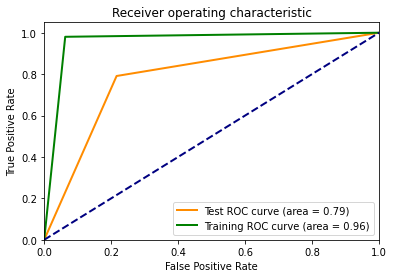

In [24]:
# We plot the ROC curve
plot_roc(y_test, clf.predict(X_test),y_train, clf.predict(X_train))